In [1]:
x=1

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import scanpy as sc
import numpy as np
import pandas as pd
import muon as mu
import scib

During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [3]:
rna = sc.read('../../../data/neurips-cite/rna_hvg_batch.h5ad')
rna

AnnData object with n_obs × n_vars = 90261 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [4]:
adt = sc.read('../../../data/neurips-cite/protein.h5ad')
adt

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/GEX_n_genes_by_counts' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/GEX_pct_counts_mt' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/GEX_size_factors' was written without encoding metadata.
  return read_elem(dataset)
/lustre/

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/obsm' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/ADT_X_pca' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/obsm/ADT_X_umap' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obsm/ADT_isotype_controls/Mouse-IgG1' was written without encoding met

AnnData object with n_obs × n_vars = 90261 × 134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
adt.var_names = ['PROT_'+name for name in adt.var_names]
rna.var_names = ['RNA_'+name for name in rna.var_names]

In [6]:
mdata = mu.MuData({'rna': rna, 'adt': adt})
mdata

MuData object with n_obs × n_vars = 90261 × 4134
  var:	'feature_types', 'gene_id'
  2 modalities
    rna:	90261 x 4000
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'
    adt:	90261 x 134
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id'
      uns:	'dataset_id', 'genome', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'

In [7]:
mdata.obs['batch'] = mdata['rna'].obs['batch'].astype('category').copy()
mdata.obs['cell_type'] = mdata['rna'].obs['cell_type'].astype('category').copy()

In [8]:
mu.tl.mofa(mdata, groups_label='batch', gpu_mode=True)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='s1d1' with N=5227 samples and D=4000 features...
Loaded view='rna' group='s1d2' with N=4978 samples and D=4000 features...
Loaded view='rna' group='s1d3' with N=6106 samples and D=4000 features...
Loaded view='rna' group='s2d1' with N=10465 samples and D=4000 features...
Loaded view='rna' group='s2d4' with N=5584 samples and D=4000 features...
Loaded vie

In [9]:
sc.pp.neighbors(mdata, use_rep='X_mofa')
sc.tl.umap(mdata)

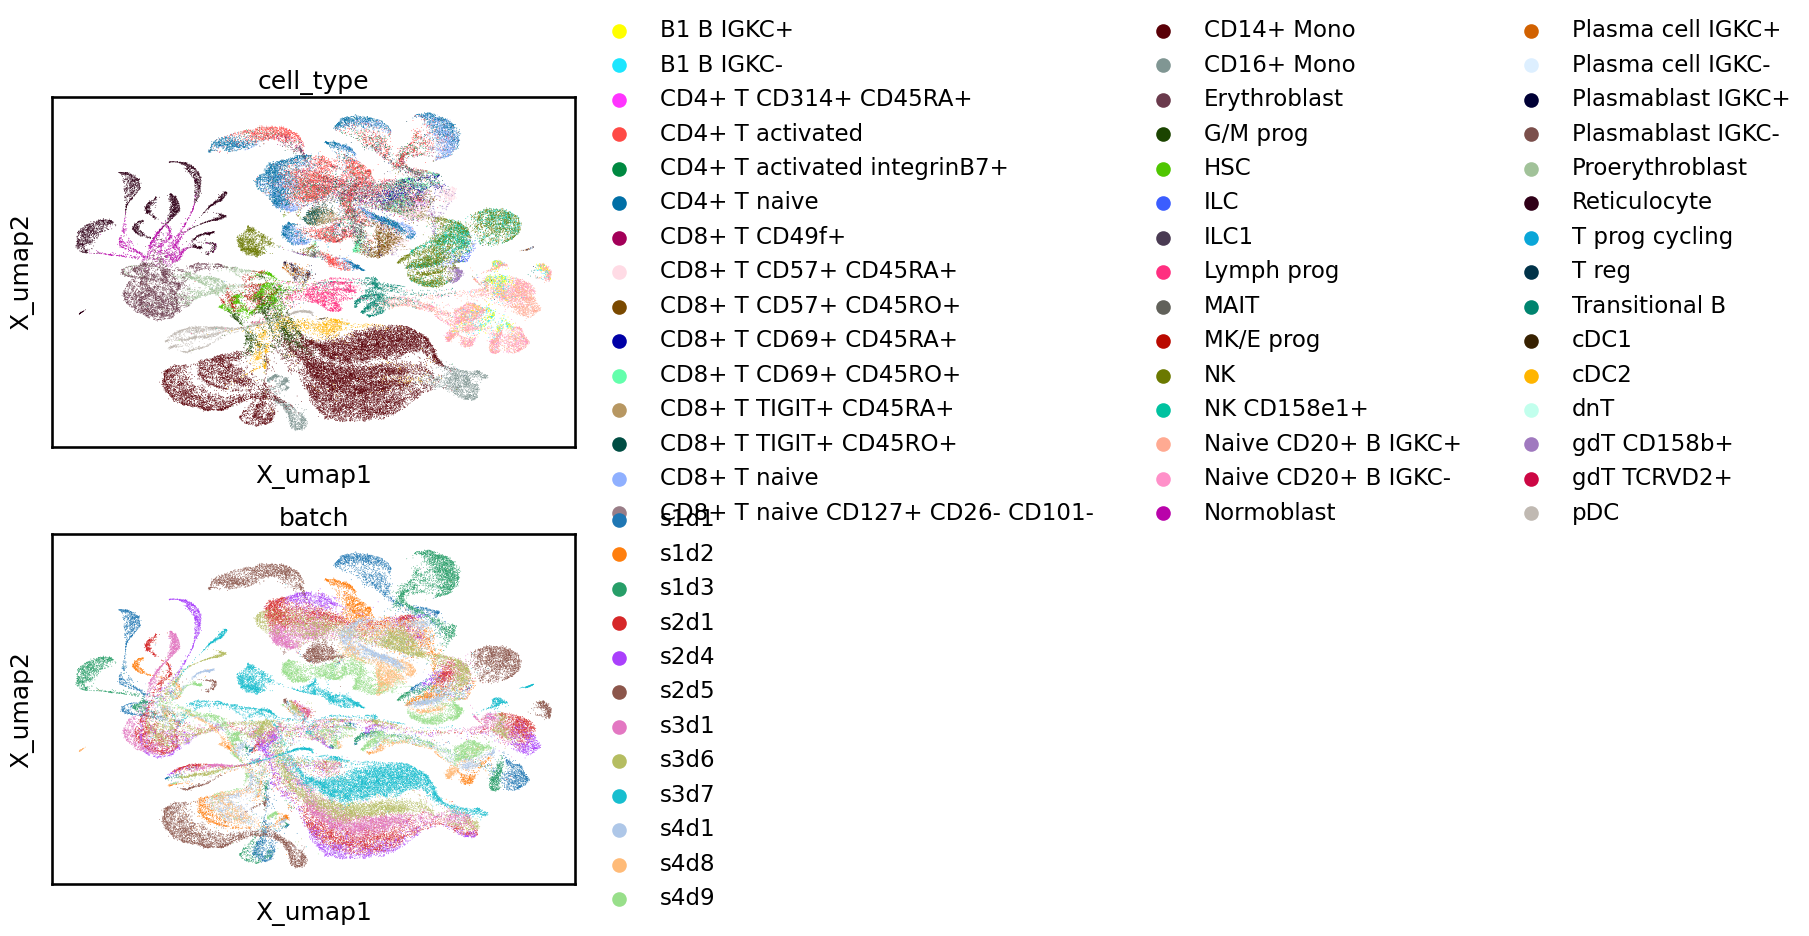

In [10]:
mu.pl.embedding(mdata, color=['cell_type', 'batch'], ncols=1, basis='umap', save='_neurips_cite_mofa.png')

In [11]:
scib_anndata = sc.AnnData(mdata.obsm['X_mofa']).copy()
scib_anndata.obs = mdata.obs.copy()
scib_anndata.uns['neighbors'] = mdata.uns['neighbors'].copy()
scib_anndata.obsp['connectivities'] = mdata.obsp['connectivities'].copy()
scib_anndata.obsp['distances'] = mdata.obsp['distances'].copy()
scib_anndata.obsm['X_mofa'] = mdata.obsm['X_mofa'].copy()

In [12]:
scib_anndata.write('neurips_cite_mofa.h5ad')

In [13]:
metrics_mofa = scib.metrics.metrics(
    scib_anndata, 
    scib_anndata, 
    batch_key='batch', 
    label_key='cell_type', 
    embed='X_mofa',
    ari_=True,
    nmi_=True,
    silhouette_=True,
    graph_conn_=True,
    isolated_labels_asw_=True,
)
metrics_mofa

NMI...
ARI...
Silhouette score...
Isolated labels ASW...
Graph connectivity...


,0
NMI_cluster/label,0.640398
ARI_cluster/label,0.374594
ASW_label,0.570123
ASW_label/batch,0.804016
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,0.445597
graph_conn,0.844645
kBET,NaN


In [14]:
metrics_mofa.to_csv('neurips_cite_mofa.csv')